In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

from empiricaldist import Pmf
from empiricaldist import Cdf

from scipy import stats
from scipy.stats import norm
from scipy import interpolate
#from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib.pyplot import stem
from matplotlib.ticker import MaxNLocator

In [2]:
# Define global variables
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}
SEED = 17

In [3]:
# Read data
gss = pd.read_hdf(r'datasets/gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


# 2. Distributions

In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.

# <font color=darkred>2.1 Probability mass functions</font>

1. Probability mass functions
>In the previous chapter, we used histograms to visualize distributions. In this chapter, I'll present two more ways to represent distributions and you'll learn when to use each of them. And we'll work with a new dataset.

2. GSS
>The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues. It is widely used by politicians, policy makers, and researchers, including me.

3. Read the data
>The GSS contains hundreds of variables; I've selected just a few. And I have already cleaned and validated them, so we just have to read the file, like this. If you run gss dot head(), you can see the first few rows.

4. Histogram
>To get started with this dataset, let's look at the distribution of educ, which records the number of years of education for each respondent. First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable. Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

5. PMF
>An alternative is a probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears. I've provided a class called Pmf that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF. I'll explain what that means soon. The result is a Series that contains the values on the left and the counts on the right. In this dataset, there are 566 respondents who report that they have zero years of formal education.

6. PMF
>You can use the bracket operator to look up a value in a Pmf and get a count. This example shows that there are 47689 respondents with 12 years of education, which is the most frequent value.

7. Normalize
>Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting normalize=True; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1. Now if we use the bracket operator, the result is a fraction. In this example, the fraction of people with 12 years of education is 0.3086, a little more than 30%.

8. Plot
>The Pmf class provides a bar() method that plots a PMF as a bar chart. And here's what it looks like. In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

9. Histogram vs. PMF
>For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

10. Let's make some PMFs!
>PMFs have limitations, too, as we'll see in the next lesson. But first, let's get some practice with PMFs.

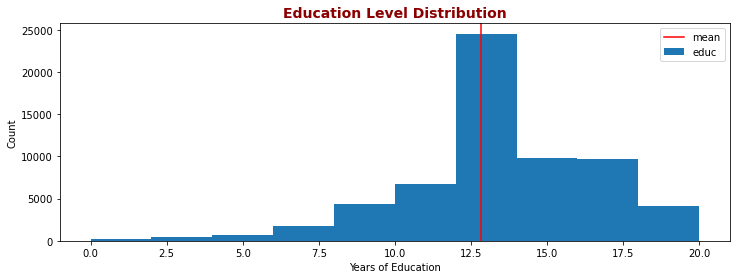

In [4]:
educ = gss['educ']

# Plot the histogram
fig = plt.figure(figsize=(12,4))
plt.hist(educ.dropna(), label='educ')
plt.axvline(educ.mean(), color='red', label='mean')

# Label the axes
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.title("Education Level Distribution", **title_param)
plt.legend()

# Show the figure
plt.show()

## <font color=indigo>**USING EMPIRICALDIST API**</font>

,probs
0.0,144
1.0,38
2.0,151
3.0,246
4.0,290
5.0,379
6.0,842
7.0,860
8.0,2421
9.0,1963


21
How many have 12 years of education? 19145


,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424


What is the proportion for 12 years of education? 0.3072836414997432


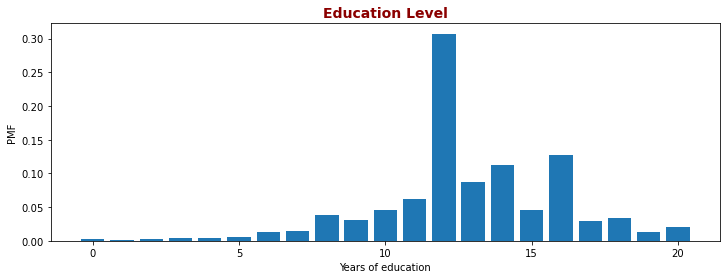

In [5]:
# PMF throug the empiricaldist API
pmf_educ = Pmf.from_seq(educ, normalize=False)
display(pmf_educ)
print(len(pmf_educ))
print('How many have 12 years of education?', pmf_educ[12])

pmf_educ = Pmf.from_seq(educ, normalize=True)
display(pmf_educ.head())
print('What is the proportion for 12 years of education?', pmf_educ[12])

fig = plt.figure(figsize=(12,4))
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.title("Education Level", **title_param)
plt.show()

## <font color=indigo>**USING SEABORN LIBRARY**</font>

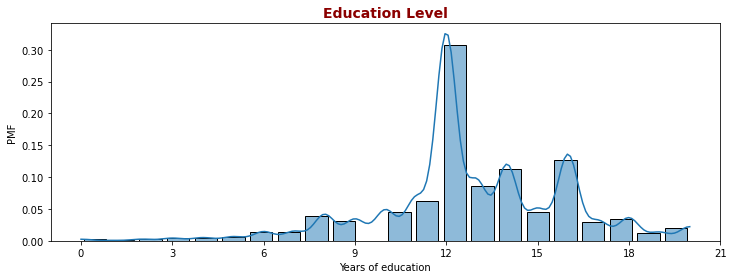

In [6]:
# PMF throug the seaborn library
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

sns.histplot(educ, stat='probability', bins=len(educ.unique()), kde=True, shrink=.8);
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.title("Education Level", **title_param)
plt.show()

## <font color=indigo>**USING SCIPY.STATS**</font>

,index,educ
0,12.0,19145
1,16.0,7953
2,14.0,6980
3,13.0,5405
4,11.0,3864


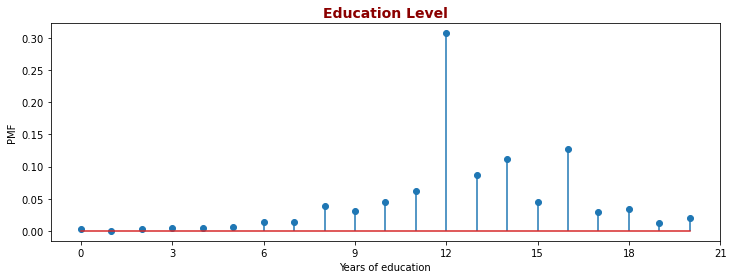

In [7]:
display(educ.value_counts().reset_index().head())

xk = educ.value_counts().index
pk = educ.value_counts().values/sum(educ.value_counts().values)
educ_var = stats.rv_discrete(name='educ', values=(xk, pk))

fig = plt.figure(figsize=(12,4))
ax = fig.gca()
#plt.plot(xk, educ_var.pmf(xk), 'ro', ms=8, mec='r')
#plt.vlines(xk, 0, educ_var.pmf(xk), colors='r', linestyles='-', lw=2)
plt.stem(xk, educ_var.pmf(xk), use_line_collection=True);
plt.xlabel('Years of education')
plt.ylabel('PMF')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Education Level", **title_param)
plt.show()

## <font color=indigo>**USING MATPLOTLIB.PYPLOT.STEM**</font>

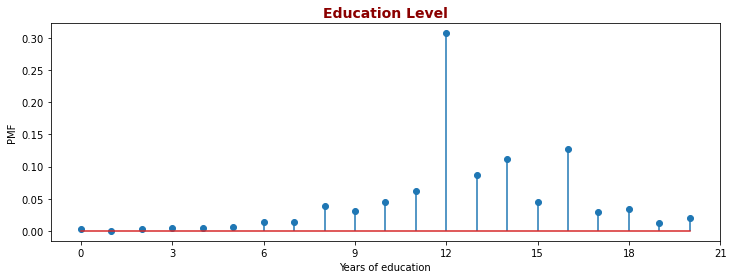

In [8]:
xk = educ.value_counts().index
pk = educ.value_counts().values/sum(educ.value_counts().values)

fig = plt.figure(figsize=(12,4))
ax = fig.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.stem(xk, pk, use_line_collection=True);
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.title("Education Level", **title_param)
plt.show()

# <font color=darkred>2.2 Make a PMF</font> 

The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the <a href="https://pypi.org/project/empiricaldist/">empiricaldist</a> library.

**Instructions**
- Make a PMF for year with normalize=False and display the result.
- How many respondents were interviewed in 2016?
    1. 2867
    2. 1613
    3. 2538
    4. 0.045897

**Results**

<font color=darkgreen>Correct. The PMF makes it easy to extract insights like this. Time now to visualize the PMF for the 'age' variable of this GSS dataset!</font>

## <font color=indigo>**USING EMPIRICALDIST API**</font>

In [9]:
# Compute the PMF for year
pmf_year = Pmf.from_seq(gss.year, normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


## <font color=indigo>**USING .VALUE_COUNTS**</font>

In [10]:
gss.year.value_counts().sort_index()

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64

# <font color=darkred>2.3 Plot a PMF</font> 

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

**Instructions**
- Select the 'age' column from the gss DataFrame and store the result in age.
- Make a normalized PMF of age. Store the result in pmf_age.
- Plot pmf_age as a bar chart.

**Results**

<font color=darkgreen>Nice job. You could also use pmf_age.plot() to plot the Pmf as a line plot.</font>

## <font color=indigo>**USING EMPIRICALDIST API**</font>

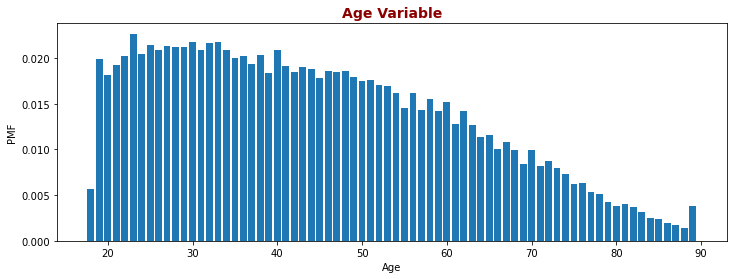

In [11]:
# Select the age column
age = gss.age

# Make a PMF of age
pmf_age = Pmf.from_seq(age, normalize=True)

# Plot the PMF
fig = plt.figure(figsize=(12,4))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
pmf_age.bar(label='age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.title("Age Variable", **title_param)
plt.show()

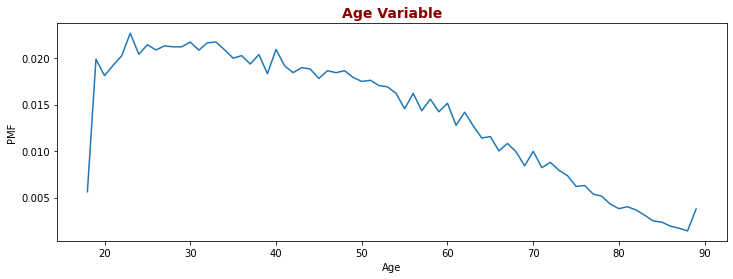

In [12]:
# Plot the PMF
fig = plt.figure(figsize=(12,4))
pmf_age.plot(label='age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.title("Age Variable", **title_param)
plt.show()

## <font color=indigo>**USING MATPLOTLIB.PYPLOT.STEM**</font>

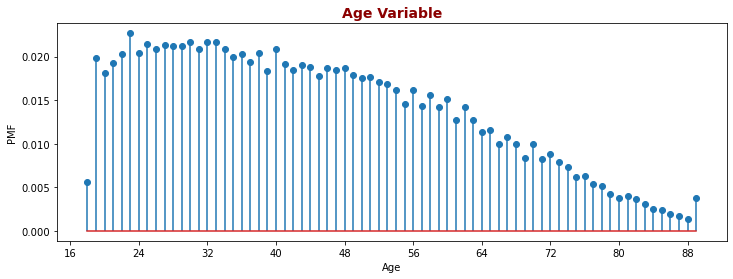

In [13]:
# Select the age column
age = gss.age
xk = age.value_counts().index
pk = age.value_counts().values/sum(age.value_counts().values)

# Plot the PMF
ax = plt.figure(figsize=(12,4)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.stem(xk, pk, use_line_collection=True);
plt.xlabel('Age')
plt.ylabel('PMF')
plt.title("Age Variable", **title_param)
plt.show()

# <font color=darkred>2.4 Cumulative distribution functions</font>

1. Cumulative distribution functions
>In the previous lesson, we saw the probability mass function, or PMF, which represents the possible values in a distribution and their probabilities. In this lesson, we'll see another way to represent a distribution, the cumulative distribution function, or CDF. CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

2. From PMF to CDF
>You might remember that a PMF tells you - if you draw a random value from a distribution - what's the chance of getting x, for any given value of x. The CDF is similar; if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

3. Example
>As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, and 5. The PMF says that the probability of value 1 is 1/5; the probability of value 2 is 2/5, and the probabilities for 3 and 5 are 1/5. The CDF is the cumulative sum of the probabilities from the PMF. For example, the CDF of 2 is three fifths, because three out of 5 values in the distribution are less than or equal to 2. The CDF of 5 is 1, or 100%, because all of the values in the distribution are less than or equal to 5.

4. Make and plot a CDF
>In the code for this course, I provide a Cdf class which is similar to the Pmf class we've seen. As a function, Cdf takes any kind of sequence and returns a new Cdf object. In this example, the sequence is the ages of respondents in the General Social Survey. The Cdf provides plot, which plots the CDF as a line. Here's what it looks like. The x-axis is the ages, from 18 to 89. The y-axis is the cumulative probabilities, from 0 to 1.

5. Evaluating the CDF
>The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability. In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. That means that about 66% of the respondents are 51 years old or younger. The arrow in the figure shows how you could read this value from the CDF, at least approximately.

6. Evaluating the inverse CDF
>The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. In this example, I look up the probability 0.25, which returns 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution". I also look up probability 0.75, which returns 57, so 75% of the respondents are 57 or younger. Again, the arrows in the figure show how you could read these values from the CDF. By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. It measures the spread of the distribution, so it is similar to standard deviation or variance. Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

7. Let's practice!
>In the next lesson, we'll use CDFs to compare distributions between groups. But first, you can practice making and plotting CDFs, and reading them forward and backward.

## <font color=indigo>**USING EMPIRICALDIST API**</font>

0.6602013455146835
30.0
57.0


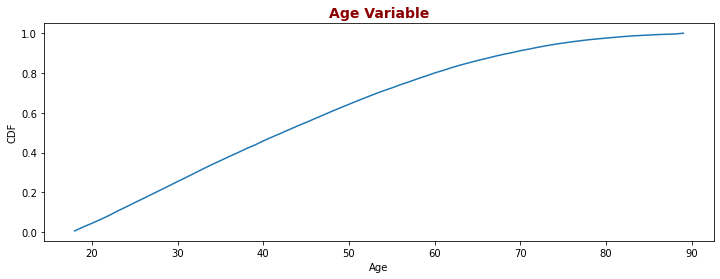

In [14]:
age_cdf = Cdf.from_seq(gss['age'])

# Evaluating the CDF
q = 51
p = age_cdf(q)
print(p)

# Evaluating the inverse CDF
p = 0.25
q = age_cdf.inverse(p)
print(q)

p = 0.75
q = age_cdf.inverse(p)
print(q)

fig = plt.figure(figsize=(12,4))
age_cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title("Age Variable", **title_param)
plt.show()

## <font color=indigo>**USING SCIPY.STATS**</font>

0.6602013455146836
57.0


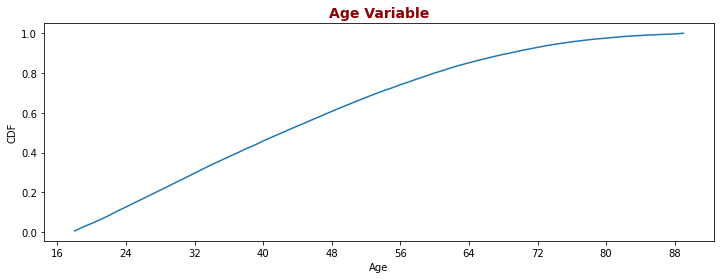

In [15]:
#display(gss.age.value_counts().reset_index().head(3))
age = gss.age.value_counts().sort_index()
age_var = stats.rv_discrete(name='age', values=(age.index, age.values/sum(age.values)))

# Evaluating the CDF
print(age_var.cdf(51))

# Evaluating the inverse CDF
print(age_var.ppf(0.75))

fig = plt.figure(figsize=(12,4))
ax = fig.gca()
plt.plot(age.index, age_var.cdf(age.index))
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title("Age Variable", **title_param)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## <font color=indigo>**USING MATPLOTLIB.PYPLOT, PANDAS, SCIPY.INTERPOLATE.INTERP1D**</font>

0.6602013455146835
57.0


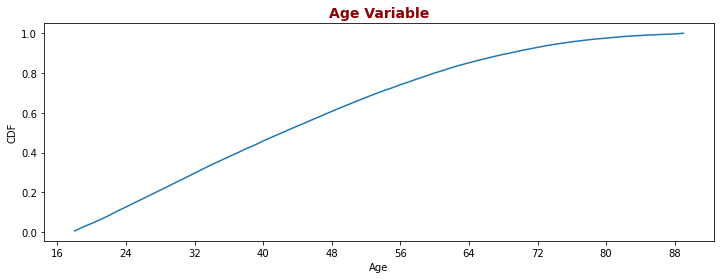

In [16]:
age_var = gss.age.value_counts().sort_index()
age_var = age_var.cumsum()/age_var.sum()

# Evaluating the CDF
print(age_var.get(51))

# Evaluating the inverse CDF
age_var_ppf = interpolate.interp1d(age_var.values, age_var.index.astype(int), kind='next')
print(age_var_ppf(0.75))

fig = plt.figure(figsize=(12,4))
ax = fig.gca()
plt.plot(age_var)
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title("Age Variable", **title_param)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

,age,count,PDF,CDF
0,18.0,350,0.005620,0.005620
1,19.0,1238,0.019878,0.025497
2,20.0,1128,0.018111,0.043609


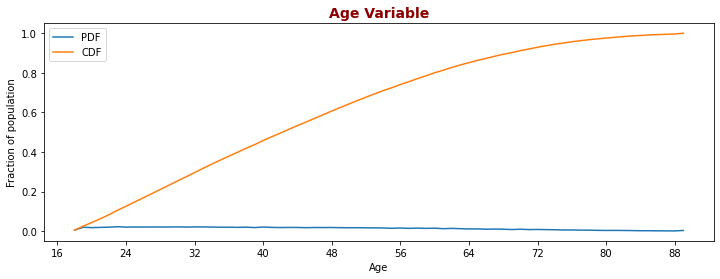

In [17]:
# Plotting both
age_var = gss.age.value_counts().sort_index().reset_index()
age_var['PDF'] = age_var.age/age_var.age.sum()
age_var['CDF'] = age_var.age.cumsum()/age_var.age.sum()
age_var.columns = ['age', 'count', 'PDF', 'CDF']
display(age_var.head(3))

fig = plt.figure(figsize=(12,4))
ax = fig.gca()
age_var.plot(x = 'age', y = ['PDF', 'CDF'], ax=ax)
plt.xlabel('Age')
plt.ylabel('Fraction of population')
plt.title("Age Variable", **title_param)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# <font color=darkred>2.5 Make a CDF</font> 

In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you can access it outside of DataCamp via the <a href="https://pypi.org/project/empiricaldist/">empiricaldist</a> library.

**Instructions**
- Select the 'age' column. Store the result in age.
- Compute the CDF of age. Store the result in cdf_age.
- Calculate the CDF of 30.
- What fraction of the respondents in the GSS dataset are OLDER than 30?

    - <font color=red>Approximately 75%</font>
    - Approximately 65%
    - Approximately 45%
    - Approximately 25%

**Results**

<font color=darkgreen>You got it. Nice job!</font>

## <font color=indigo>**USING EMPIRICALDIST API**</font>

In [18]:
%%time

# Select the age column
age = gss.age

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))

# Fraction of pop > 30
print(1 - cdf_age(30))

0.2539137136526389
0.7460862863473612
Wall time: 2.64 ms


## <font color=indigo>**USING SCIPY.STATS**</font>

In [19]:
%%time

# Create the discrete variable
age = gss.age.value_counts().sort_index()
age_var = stats.rv_discrete(name='age', values=(age.index, age.values/sum(age.values)))

# Calculate the CDF of 30
print(age_var.cdf(30))

# Fraction of pop > 30
#print(1 - age_var.cdf(30))
print(age_var.sf(30))

0.2539137136526388
0.7460862863473612
Wall time: 3.99 ms


# <font color=darkred>2.6 Compute IQR</font> 

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.

**Instructions**
- Calculate the 75th percentile of income and store it in percentile_75th.
- Calculate the 25th percentile of income and store it in percentile_25th.
- Calculate the interquartile range of income. Store the result in iqr.
- What is the interquartile range (IQR) of income in the GSS datset?
    
    - <font color=red>Approximately 29676</font>
    - Approximately 26015
    - Approximately 34702
    - Approximately 30655

**Results**

<font color=darkgreen>That's it. Now, just one more exercise for this lesson.</font>

## <font color=indigo>**USING EMPIRICALDIST API**</font>

In [20]:
%%time
# Compute the CDF of income
cdf_income = Cdf.from_seq(gss.realinc)

# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0
Wall time: 4.98 ms


## <font color=indigo>**USING SCIPY.STATS**</font>

In [21]:
%%time

# Create the discrete variable
income = gss.realinc.value_counts().sort_index()
income_var = stats.rv_discrete(name='income', values=(income.index, income.values/sum(income.values)))

# Print the interquartile range
print(income_var.ppf(.75) - income_var.ppf(.25))

29676.0
Wall time: 6.98 ms


# <font color=darkred>2.7 Plot a CDF</font> 

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

**Instructions**
- Select 'realinc' from the gss dataset.
- Make a Cdf object called cdf_income.
- Create a plot of cdf_income using .plot().

**Results**

<font color=darkgreen>Excellent. You are ready for the next lesson, in which you'll learn how to compare distributions!</font>

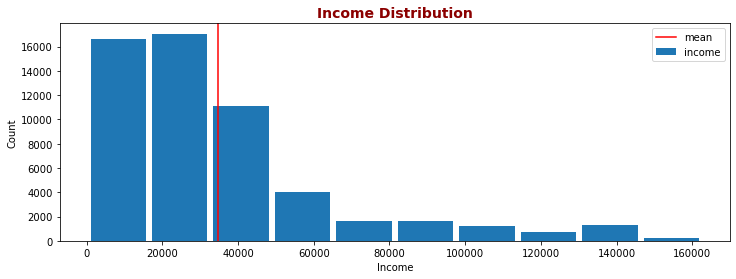

In [22]:
# Make a PMF of income
income = gss.realinc

# Plot the histogram
fig = plt.figure(figsize=(12,4))
plt.hist(income.dropna(), label='income', rwidth=.9)
plt.axvline(income.mean(), color='red', label='mean')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Income Distribution", **title_param)
plt.legend()
plt.show()

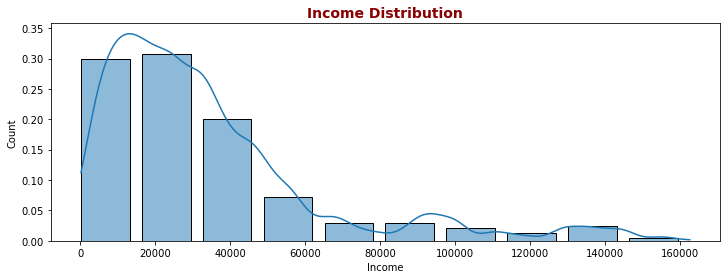

In [23]:
# Make a PMF of income
income = gss.realinc

# PMF throug the seaborn library
fig = plt.figure(figsize=(12,4))
sns.histplot(income, stat='probability', bins=10, kde=True, shrink=.8);
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Income Distribution", **title_param)
plt.show()

## <font color=indigo>**USING EMPIRICALDIST API**</font>

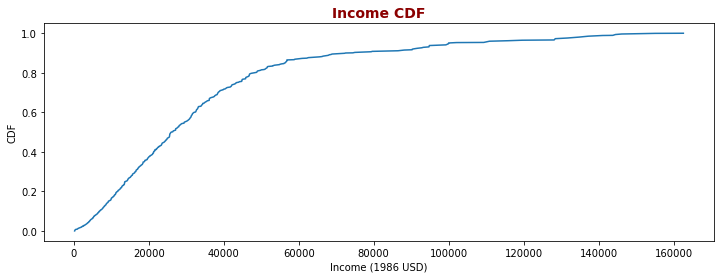

Wall time: 137 ms


In [24]:
%%time

# Select realinc
income = gss.realinc

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
fig = plt.figure(figsize=(12,4))
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.title("Income CDF", **title_param)
plt.show()

## <font color=indigo>**USING SCIPY.STATS**</font>

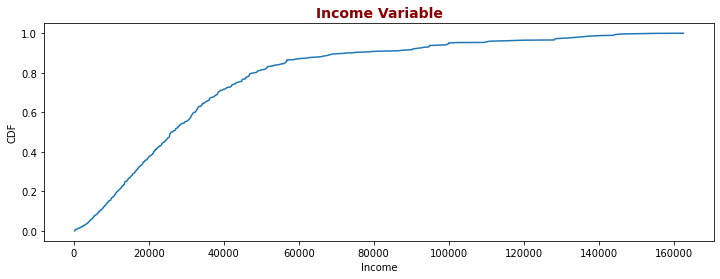

Wall time: 137 ms


In [25]:
%%time

# Create the discrete variable
income = gss.realinc.value_counts().sort_index()
income_var = stats.rv_discrete(name='income', values=(income.index, income.values/sum(income.values)))

# Plot it
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
plt.plot(income.index, income_var.cdf(income.index))
plt.xlabel('Income')
plt.ylabel('CDF')
plt.title("Income Variable", **title_param)
plt.show()

# <font color=darkred>2.8 Comparing distributions</font>

1. Comparing distributions
>So far we've seen two ways to represent distributions, PMFs and CDFs. In this lesson, we'll use PMFs and CDFs to compare distributions, and we'll see the pros and cons of each.

2. Multiple PMFs
>One way to compare distributions is to plot multiple PMFs on the same axes. For example, suppose we want to compare the distribution of age for male and female respondents. First I'll create a boolean Series that's true for male respondents. And I'll extract the age column. Now I can select ages for the male and female respondents. And plot a Pmf for each. Of course I always remember to label the axes!

3. Age PMFs
>Here's the result. It looks like there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

4. Multiple CDFs
>We can do the same thing with CDFs. Here's the code: everything is the same except I replaced Pmf with Cdf.

5. Age CDFs
>And here is the result. In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.

6. Income distribution
>As another example, let's look at household income and compare the distribution before and after 1995 (I chose 1995 because it's roughly the midpoint of the survey). The variable realinc represents household income in 1986 dollars. I'll make a boolean Series to select respondents interviewed before 1995. Now I can plot the PMFs. And label the axes.

7. Income PMFs
>Here's what it looks like. There are a lot of unique values in this distribution, and none of them appear very often. The PMF is so noisy, we can't really see the shape of the distribution. It looks like there are more people with high incomes after 1995, but it's hard to tell. We can get a clearer picture with a CDF.

8. Income CDFs
>Here's the code to generate the CDFs.

9. Income CDFs
>And here are the results. Below \$30,000 the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right. In other words, the fraction of people with high incomes is about the same, but the income of high earners has increased.

10. Let's practice!
>In general, I recommend CDFs for exploratory analysis. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two. In the exercises for this lesson, you'll have a chance to compare incomes for respondents with different education levels.

## <font color=indigo>**COMPARING PMFs**</font>

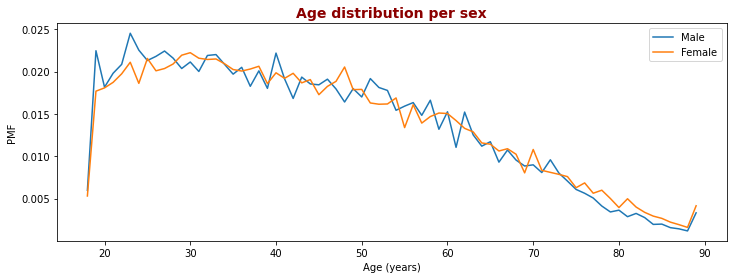

Wall time: 225 ms


In [26]:
%%time
# USING EMPIRICALDIST API
male = gss.sex == 1
age = gss.age

male_age = age[male]
female_age = age[~male]

# Plot PMF
fig = plt.figure(figsize=(12,4))
Pmf.from_seq(male_age  , normalize=True).plot(label='Male')
Pmf.from_seq(female_age, normalize=True).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('PMF')
plt.legend()
plt.title("Age distribution per sex", **title_param)
plt.show()

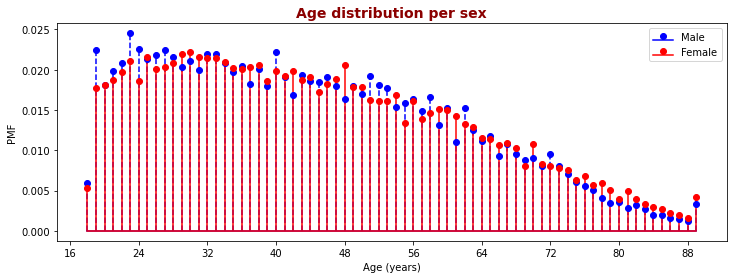

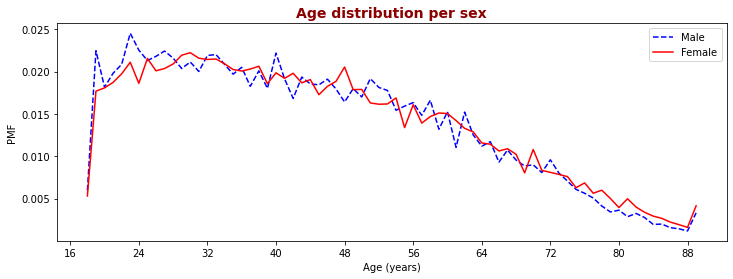

Wall time: 339 ms


In [27]:
%%time
# USING SCIPY.STATS
male = gss.sex == 1
age = gss.age

male_age = age[male].value_counts().sort_index()
female_age = age[~male].value_counts().sort_index()

# Setting the variables
mx, my = male_age.index, male_age.values/sum(male_age.values)
male_age_var = stats.rv_discrete(name='male_age', values=(mx, my))
fx, fy = female_age.index, female_age.values/sum(female_age.values)
female_age_var = stats.rv_discrete(name='female_age', values=(fx, fy))

# Plot PMF
ax = plt.figure(figsize=(12,4)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.stem(mx, my, linefmt='b--', markerfmt='bo', basefmt='b', use_line_collection=True, label='Male');
plt.stem(fx, fy, linefmt='r'  , markerfmt='ro', basefmt='r', use_line_collection=True, label='Female');
plt.xlabel('Age (years)')
plt.ylabel('PMF')
plt.legend()
plt.title("Age distribution per sex", **title_param)
plt.show()

# Plot PMF
ax = plt.figure(figsize=(12,4)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(mx, my, 'b--', label='Male');
plt.plot(fx, fy, 'r'  , label='Female');
plt.xlabel('Age (years)')
plt.ylabel('PMF')
plt.legend()
plt.title("Age distribution per sex", **title_param)
plt.show()

## <font color=indigo>**COMPARING CDFs**</font>

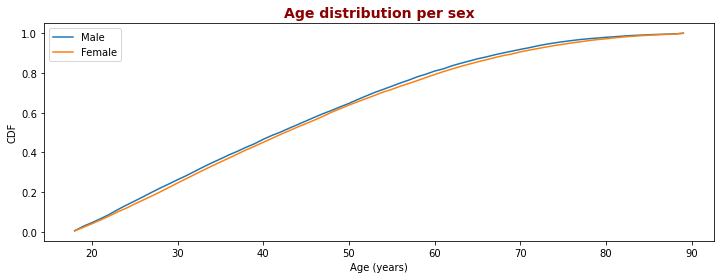

Wall time: 236 ms


In [28]:
%%time
# USING EMPIRICALDIST API
male = gss.sex == 1
age = gss.age

male_age = age[male]
female_age = age[~male]

# Plot CDF
fig = plt.figure(figsize=(12,4))
Cdf.from_seq(male_age  , normalize=True).plot(label='Male')
Cdf.from_seq(female_age, normalize=True).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.legend()
plt.title("Age distribution per sex", **title_param)
plt.show()

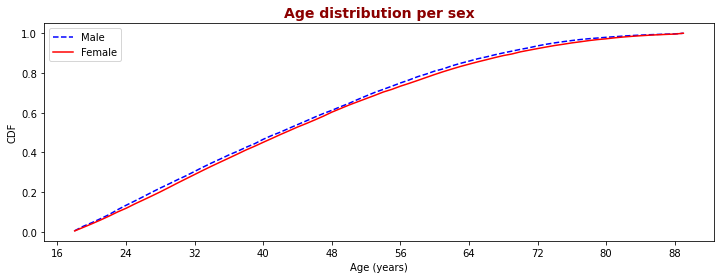

Wall time: 165 ms


In [29]:
%%time
# USING SCIPY.STATS
male = gss.sex == 1
age = gss.age

male_age = age[male].value_counts().sort_index()
female_age = age[~male].value_counts().sort_index()

# Setting the variables
mx, my = male_age.index, male_age.values/sum(male_age.values)
male_age_var = stats.rv_discrete(name='male_age', values=(mx, my))
fx, fy = female_age.index, female_age.values/sum(female_age.values)
female_age_var = stats.rv_discrete(name='female_age', values=(fx, fy))

# Plot CDF
ax = plt.figure(figsize=(12,4)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(mx, male_age_var.cdf(mx)  , 'b--', label='Male');
plt.plot(fx, female_age_var.cdf(fx), 'r'  , label='Female');
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.legend()
plt.title("Age distribution per sex", **title_param)
plt.show()

## <font color=indigo>**ANOTHER EXAMPLE - INCOME DISTRIBUTION PER PERIOD OF TIME**</font>

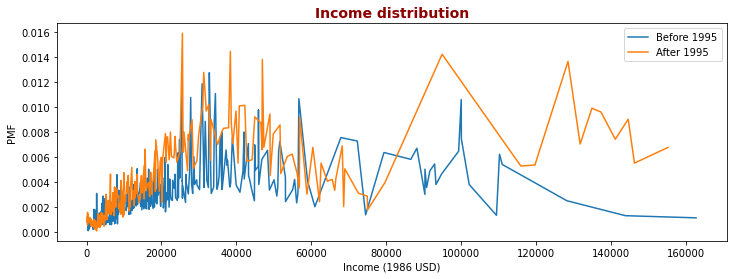

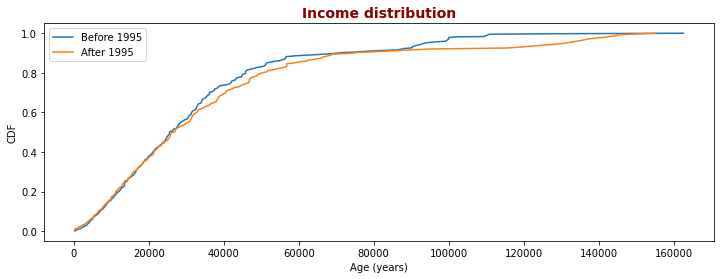

Wall time: 360 ms


In [30]:
%%time
#####################################################################
# USING EMPIRICALDIST API
#####################################################################

# Seting the variables
income = gss.realinc
pre95 = gss.year < 1995

# Plot PMF
fig = plt.figure(figsize=(12,4))
Pmf.from_seq(income[pre95]).plot(label='Before 1995')
Pmf.from_seq(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

# Plot CDF
fig = plt.figure(figsize=(12,4))
Cdf.from_seq(income[pre95]).plot(label='Before 1995')
Cdf.from_seq(income[~pre95]).plot(label='After 1995')
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

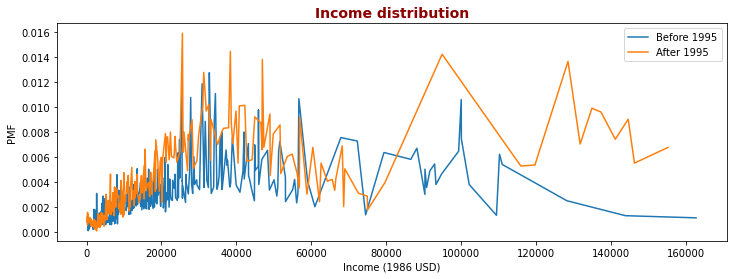

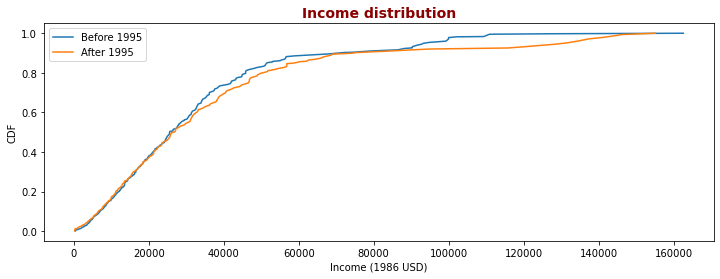

Wall time: 351 ms


In [31]:
%%time
#####################################################################
# USING USING SCIPY.STATS
#####################################################################

# Seting the variables
income = gss.realinc
pre95 = gss.year < 1995

income_bef1995 = income[pre95].value_counts().sort_index()
income_aft1995 = income[~pre95].value_counts().sort_index()

ib_x, ib_y = income_bef1995.index, income_bef1995.values/sum(income_bef1995.values)
ia_x, ia_y = income_aft1995.index, income_aft1995.values/sum(income_aft1995.values)

income_bef_var = stats.rv_discrete(name='income_bef1995', values=(ib_x, ib_y))
income_aft_var = stats.rv_discrete(name='income_aft1995', values=(ia_x, ia_y))

# Plot PMF
fig = plt.figure(figsize=(12,4))
plt.plot(ib_x, ib_y, label='Before 1995');
plt.plot(ia_x, ia_y, label='After 1995');
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

# Plot CDF
fig = plt.figure(figsize=(12,4))
plt.plot(ib_x, income_bef_var.cdf(ib_x), label='Before 1995');
plt.plot(ia_x, income_aft_var.cdf(ia_x), label='After 1995');
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

## <font color=indigo>**ANOTHER EXAMPLE - INCOME DISTRIBUTION PER SEX**</font>

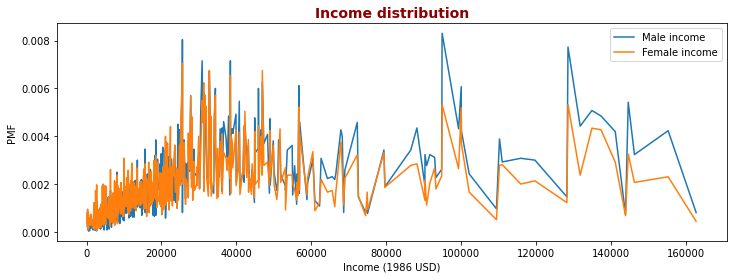

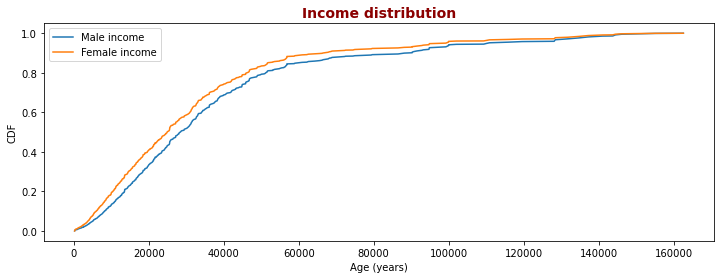

Wall time: 357 ms


In [32]:
%%time
#####################################################################
# USING EMPIRICALDIST API
#####################################################################

# Seting the variables
income = gss.realinc
male = gss.sex == 1

# Plot PMF
fig = plt.figure(figsize=(12,4))
Pmf.from_seq(income[male] ).plot(label='Male income')
Pmf.from_seq(income[~male]).plot(label='Female income')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

# Plot CDF
fig = plt.figure(figsize=(12,4))
Cdf.from_seq(income[male]).plot(label='Male income')
Cdf.from_seq(income[~male]).plot(label='Female income')
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

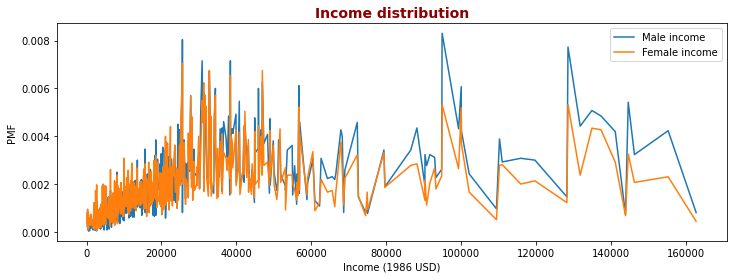

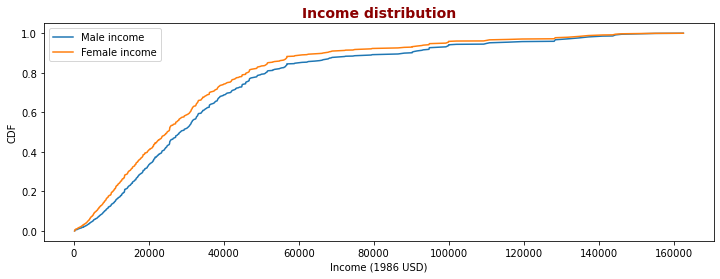

Wall time: 322 ms


In [33]:
%%time
#####################################################################
# USING USING SCIPY.STATS
#####################################################################

# Seting the variables
income = gss.realinc
male = gss.sex == 1

income_male = income[male].value_counts().sort_index()
income_female = income[~male].value_counts().sort_index()

im_x, im_y = income_male.index  , income_male.values/sum(income_male.values)
if_x, if_y = income_female.index, income_female.values/sum(income_female.values)

income_male_var = stats.rv_discrete(name='income_male', values=(im_x, im_y))
income_female_var = stats.rv_discrete(name='income_female', values=(if_x, if_y))

# Plot PMF
fig = plt.figure(figsize=(12,4))
plt.plot(im_x, im_y, label='Male income');
plt.plot(if_x, if_y, label='Female income');
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

# Plot CDF
fig = plt.figure(figsize=(12,4))
plt.plot(im_x, income_male_var.cdf(im_x), label='Male income');
plt.plot(if_x, income_female_var.cdf(if_x), label='Female income');
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

# <font color=darkred>2.9 Distribution of education</font>

**Instructions**

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called gss. The variable educ represents the respondent's years of education.

What fraction of respondents report that they have 12 years of education or fewer?

**Possible Answers**

- Approximately 22%
- Approximately 31%
- Approximately 47%
- <font color=red>Approximately 53%</font>

**Results**

<font color=darkgreen>Correct. If you evaluate the CDF at 12, you get the fraction of respondents with 12 or fewer years of eduction.</font>

In [34]:
%%time
#####################################################################
# USING EMPIRICALDIST API
#####################################################################

Cdf.from_seq(gss.educ)(12)

Wall time: 2.1 ms


array(0.53226117)

In [35]:
%%time
#####################################################################
# USING USING SCIPY.STATS
#####################################################################

# Seting the variables
educ = gss.educ.value_counts().sort_index()
x, y = educ.index  , educ.values/sum(educ.values)
educ_var = stats.rv_discrete(name='educ', values=(x, y))

educ_var.cdf(12)

Wall time: 1.96 ms


0.5322611710323575

# <font color=darkred>2.10 Extract education levels</font>

**Instructions**

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

**Results**
- Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
- Complete the line that identifies respondents with 12 or fewer years of education.
- Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

<font color=darkgreen>Excellent. Remember, you can use logical operators to make Boolean Series and select rows from a DataFrame or Series.</font>

In [36]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


# <font color=darkred>2.11 Plot income CDFs</font>

**Instructions**

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

<code>
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')
</code>

You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

**Results**
- Fill in the missing lines of code to plot the CDFs.

<font color=darkgreen>Nice job. It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.</font>

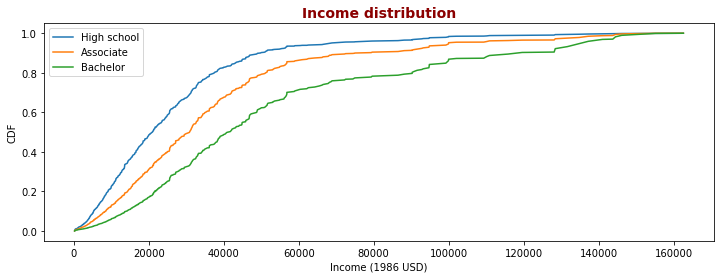

Wall time: 196 ms


In [37]:
%%time
#####################################################################
# USING EMPIRICALDIST API
#####################################################################

# Seting the variables
income = gss.realinc
educ = gss['educ']
high = (educ <= 12)
bach = (educ >= 16)
assc = (educ >= 14) & (educ < 16)

# Plot CDF
fig = plt.figure(figsize=(12,4))
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

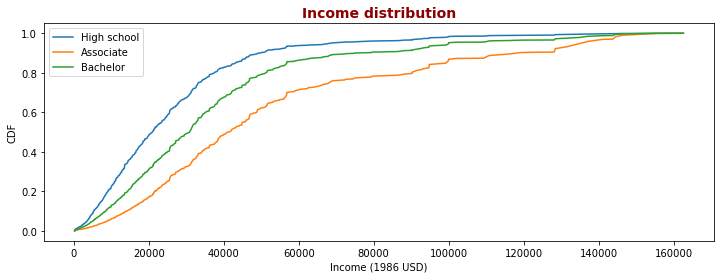

Wall time: 221 ms


In [38]:
%%time
#####################################################################
# USING USING SCIPY.STATS
#####################################################################

# Seting the variables
income = gss.realinc
educ = gss['educ']
high = (educ <= 12)
bach = (educ >= 16)
assc = (educ >= 14) & (educ < 16)

income_high = income[high].value_counts().sort_index()
income_bach = income[bach].value_counts().sort_index()
income_assc = income[assc].value_counts().sort_index()

high_x, high_y = income_high.index, income_high.values/sum(income_high.values)
bach_x, bach_y = income_bach.index, income_bach.values/sum(income_bach.values)
assc_x, assc_y = income_assc.index, income_assc.values/sum(income_assc.values)

income_high_var = stats.rv_discrete(name='income_high', values=(high_x, high_y))
income_bach_var = stats.rv_discrete(name='income_bach', values=(bach_x, bach_y))
income_assc_var = stats.rv_discrete(name='income_assc', values=(assc_x, assc_y))

# Plot CDF
fig = plt.figure(figsize=(12,4))
plt.plot(high_x, income_high_var.cdf(high_x), label='High school');
plt.plot(bach_x, income_bach_var.cdf(bach_x), label='Associate');
plt.plot(assc_x, income_assc_var.cdf(assc_x), label='Bachelor');
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.title("Income distribution", **title_param)
plt.show()

# <font color=darkred>2.12 Modeling distributions</font>

1. Modeling distributions
>In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

2. The normal distribution
>Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF. This sigmoid shape is what we expect to see with values from a normal distribution.

3. The normal CDF
>SciPy provides an object called norm that represents the normal distribution. I'll use np dot linspace() to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. Dot cdf() evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

4. Comparing CDFs
>Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

5. The bell curve
>The norm object also provides dot pdf(), which evaluates the probability density function, or PDF. And here's what that looks like. It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

6. Sample PMF
>Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

7. KDE plot
>To generate a KDE plot, we'll use the Seaborn library for data visualization, which I import as sns. Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.

8. KDE and PDF
>Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result. The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

9. PMF, CDF, KDE
>To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE. In general, I use CDFs when I am exploring data. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll use a PMF for distributions with a small number of unique values and KDE if there are a lot of values.

10. Let's practice!
>Now let's practice what we learned in this lesson.

## <font color=indigo>**CDF**</font>

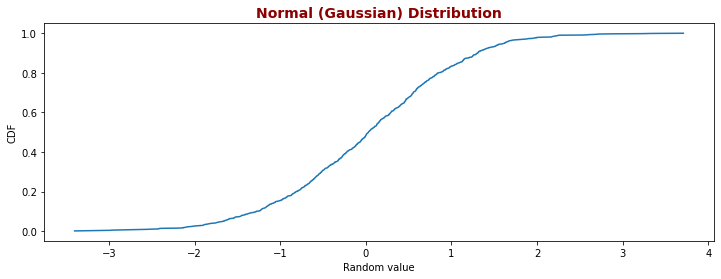

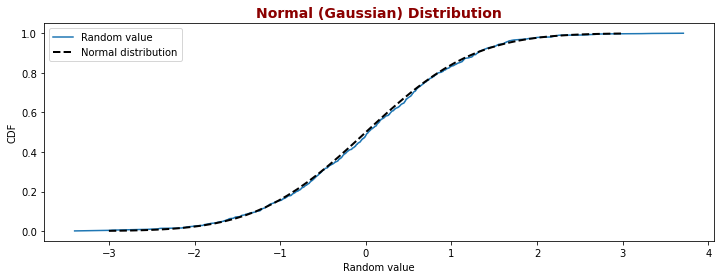

In [39]:
# The normal distribution
np.random.seed(SEED)
sample = np.random.normal(size=1000)

fig = plt.figure(figsize=(12,4))
Cdf.from_seq(sample).plot()
plt.xlabel('Random value')
plt.ylabel('CDF')
plt.title("Normal (Gaussian) Distribution", **title_param)
plt.show()


# The normal CDF
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)

fig = plt.figure(figsize=(12,4))
Cdf.from_seq(sample).plot(label='Random value')
plt.plot(xs, ys, 'k--', lw=2, label='Normal distribution')
plt.xlabel('Random value')
plt.ylabel('CDF')
plt.legend()
plt.title("Normal (Gaussian) Distribution", **title_param)
plt.show()

## <font color=indigo>**PMF**</font>

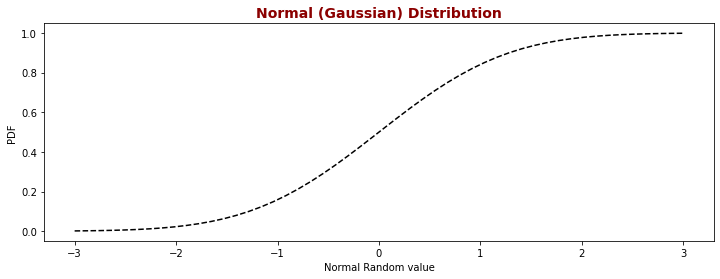

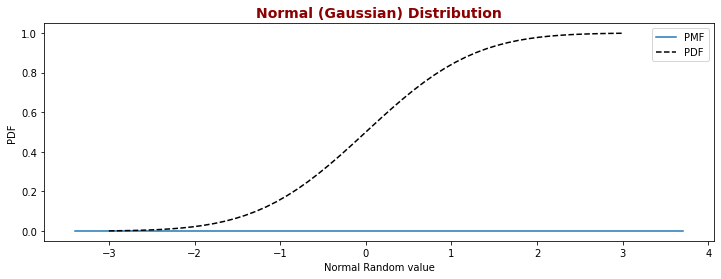

In [40]:
# The bell curve
np.random.seed(SEED)
sample = np.random.normal(size=1000)

fig = plt.figure(figsize=(12,4))
plt.plot(xs, ys, 'k--')
plt.xlabel('Normal Random value')
plt.ylabel('PDF')
plt.title("Normal (Gaussian) Distribution", **title_param)
plt.show()

# The normal PDF
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)

fig = plt.figure(figsize=(12,4))
Pmf.from_seq(sample).plot(label='PMF')
plt.plot(xs, ys, 'k--', label='PDF')
plt.xlabel('Normal Random value')
plt.ylabel('PDF')
plt.legend()
plt.title("Normal (Gaussian) Distribution", **title_param)
plt.show()

## <font color=indigo>**KDE**</font>

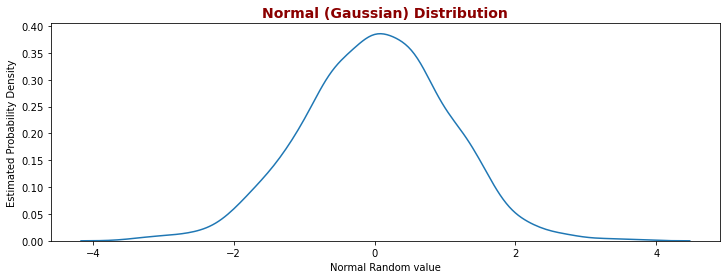

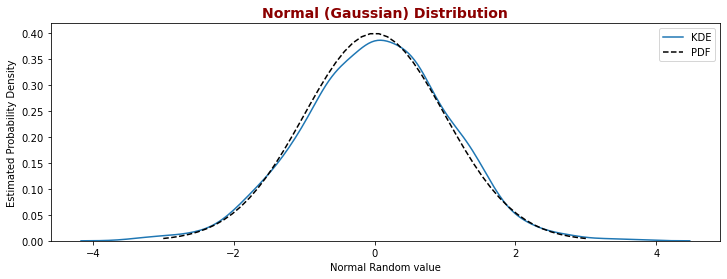

In [41]:
# KDE plot
np.random.seed(SEED)
sample = np.random.normal(size=1000)

fig = plt.figure(figsize=(12,4))
sns.kdeplot(sample)
plt.xlabel('Normal Random value')
plt.ylabel('Estimated Probability Density')
plt.title("Normal (Gaussian) Distribution", **title_param)
plt.show()

# KDE and PDF
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)

fig = plt.figure(figsize=(12,4))
sns.kdeplot(sample, label='KDE')
plt.plot(xs, ys, 'k--', label='PDF')
plt.xlabel('Normal Random value')
plt.ylabel('Estimated Probability Density')
plt.legend()
plt.title("Normal (Gaussian) Distribution", **title_param)
plt.show()

# <font color=darkred>2.13 Distribution of income</font> 

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">scipy.stats.norm()</a> function.

**Instructions**
- Extract 'realinc' from gss and compute its logarithm using np.log10().
- Compute the mean and standard deviation of the result.
- Make a norm object by passing the computed mean and standard deviation to norm().

**Results**

<font color=darkgreen>Nice work. Now we can plot the model and the observed distribution and see where they differ.</font>

In [42]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677934171 0.4290082383271385


# <font color=darkred>2.14 Comparing CDFs</font> 

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:

<code>
# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])
# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()
# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
</code>

dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

**Instructions**
- Evaluate the normal cumulative distribution function using dist.cdf.
- Use the Cdf() function to compute the CDF of log_income.
- Plot the result.

**Results**

<font color=darkgreen>Good job. The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.</font>

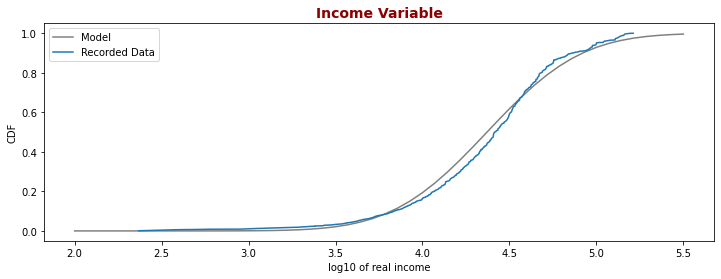

In [43]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
fig = plt.figure(figsize=(12,4))
plt.plot(xs, ys, color='gray', label='Model')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot(label='Recorded Data')
    
# Label the axes
plt.xlabel('log10 of real income')
plt.ylabel('CDF')
plt.legend()
plt.title("Income Variable", **title_param)
plt.show()

# <font color=darkred>2.15 Comparing PDFs</font> 

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

<code>
from scipy.stats import norm
dist = norm(mean, std)
</code>

Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's <a href='https://seaborn.pydata.org/generated/seaborn.kdeplot.html'>kdeplot()</a> function. To learn more about this function and Seaborn, you can check out DataCamp's <a href='https://www.datacamp.com/courses/data-visualization-with-seaborn'>Data Visualization with Seaborn</a> course. Here, Seaborn has been imported for you as sns.

**Instructions**
- Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.
- Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.

**Results**

<font color=darkgreen>Congratulations on completing Chapter 2! We've seen several ways to vizualize and compare distributions: PMFs, CDFs, and KDE plots. In the next Chapter we'll explore relationships between variables, starting with heights and weights from a large survey of adults in the U.S. See you there!</font>

In [44]:
# Preparing the data
np.random.seed(SEED)

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
dist = norm(mean, std)

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

4.371148677934171 0.4290082383271385


Text(0.5, 1.0, 'Normal (Gaussian) Distribution')

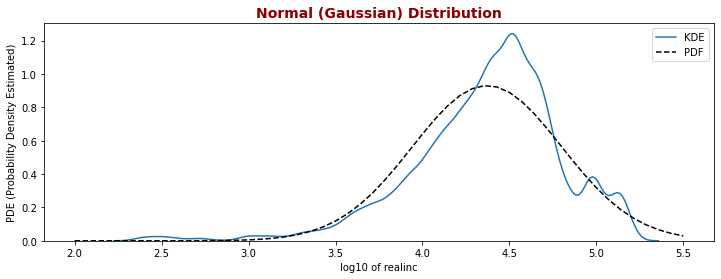

In [45]:
# Plot the model CDF
fig = plt.figure(figsize=(12,4))
sns.kdeplot(log_income, label='KDE')
plt.plot(xs, ys, 'k--', label='PDF')
plt.xlabel('log10 of realinc')
plt.ylabel('PDE (Probability Density Estimated)')
plt.legend()
plt.title("Normal (Gaussian) Distribution", **title_param)

<AxesSubplot:ylabel='Density'>

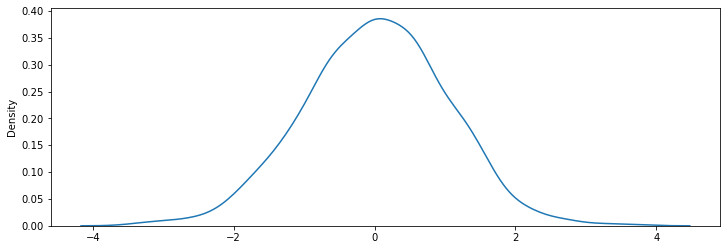

In [46]:
# KDE and PDF
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)

fig = plt.figure(figsize=(12,4))
sns.kdeplot(sample, label='KDE')


# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/exploratory-data-analysis-in-python
- empiricaldist library documentation:
    - https://pypi.org/project/empiricaldist/
    - https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb
- Find element's index in pandas Series
    - https://stackoverflow.com/questions/18327624/find-elements-index-in-pandas-series